In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
from collections import Counter
import ast

# Extracción

## 1. Corroborar que las carpetas existan y, de lo contrario, crearlas


In [2]:
#%run scripts/verificar_crear_carpetas.py

## 2. Descargar los archivos si no existen

In [3]:
#%run scripts/descargar_archivos.py

## 3. Descomprimir los archivos

In [4]:
#%run scripts/descomprimir_archivos.py


## 4. Descomprimir los archivos sin errores

In [5]:
#%run scripts/procesar_archivos_gzip.py

## 5. Cargar los archivos en DataFrames y mostrar en formato Markdown


In [6]:
# Especificamos la ruta de los archivos JSON con el prefijo "se"
carpeta = "datasets/original"
archivo1 = os.path.join(carpeta, "se_user_reviews.json")
archivo2 = os.path.join(carpeta, "se_users_items.json")
archivo3 = os.path.join(carpeta, "se_steam_games.json")

# Cargamos los archivos JSON en DataFrames
df_user_reviews = pd.read_json(archivo1, orient='records', lines=True)
df_users_items = pd.read_json(archivo2, orient='records', lines=True)
df_steam_games = pd.read_json(archivo3, orient='records', lines=True)

# Imprimimos los DataFrames en formato Markdown
print("### DataFrame: user_reviews")
print(df_user_reviews.head().to_markdown(index=False))
print("\n### DataFrame: users_items")
print(df_users_items.head().to_markdown(index=False))
print("\n### DataFrame: steam_games")
print(df_steam_games.head().to_markdown(index=False))

### DataFrame: user_reviews
| user_id           | user_url                                             | reviews                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

# TRANSFORMACIÓN

## 1. EDA steam_games.json

### Limpieza y Preprocesamiento de los Datos

1. Identificar valores nulos:

In [7]:
# Verificar los valores nulos por columna
print(df_steam_games.isnull().sum())

publisher       96362
genres          91593
app_name        88312
title           90360
url             88310
release_date    90377
tags            88473
reviews_url     88312
specs           88980
price           89687
early_access    88310
id              88312
developer       91609
dtype: int64


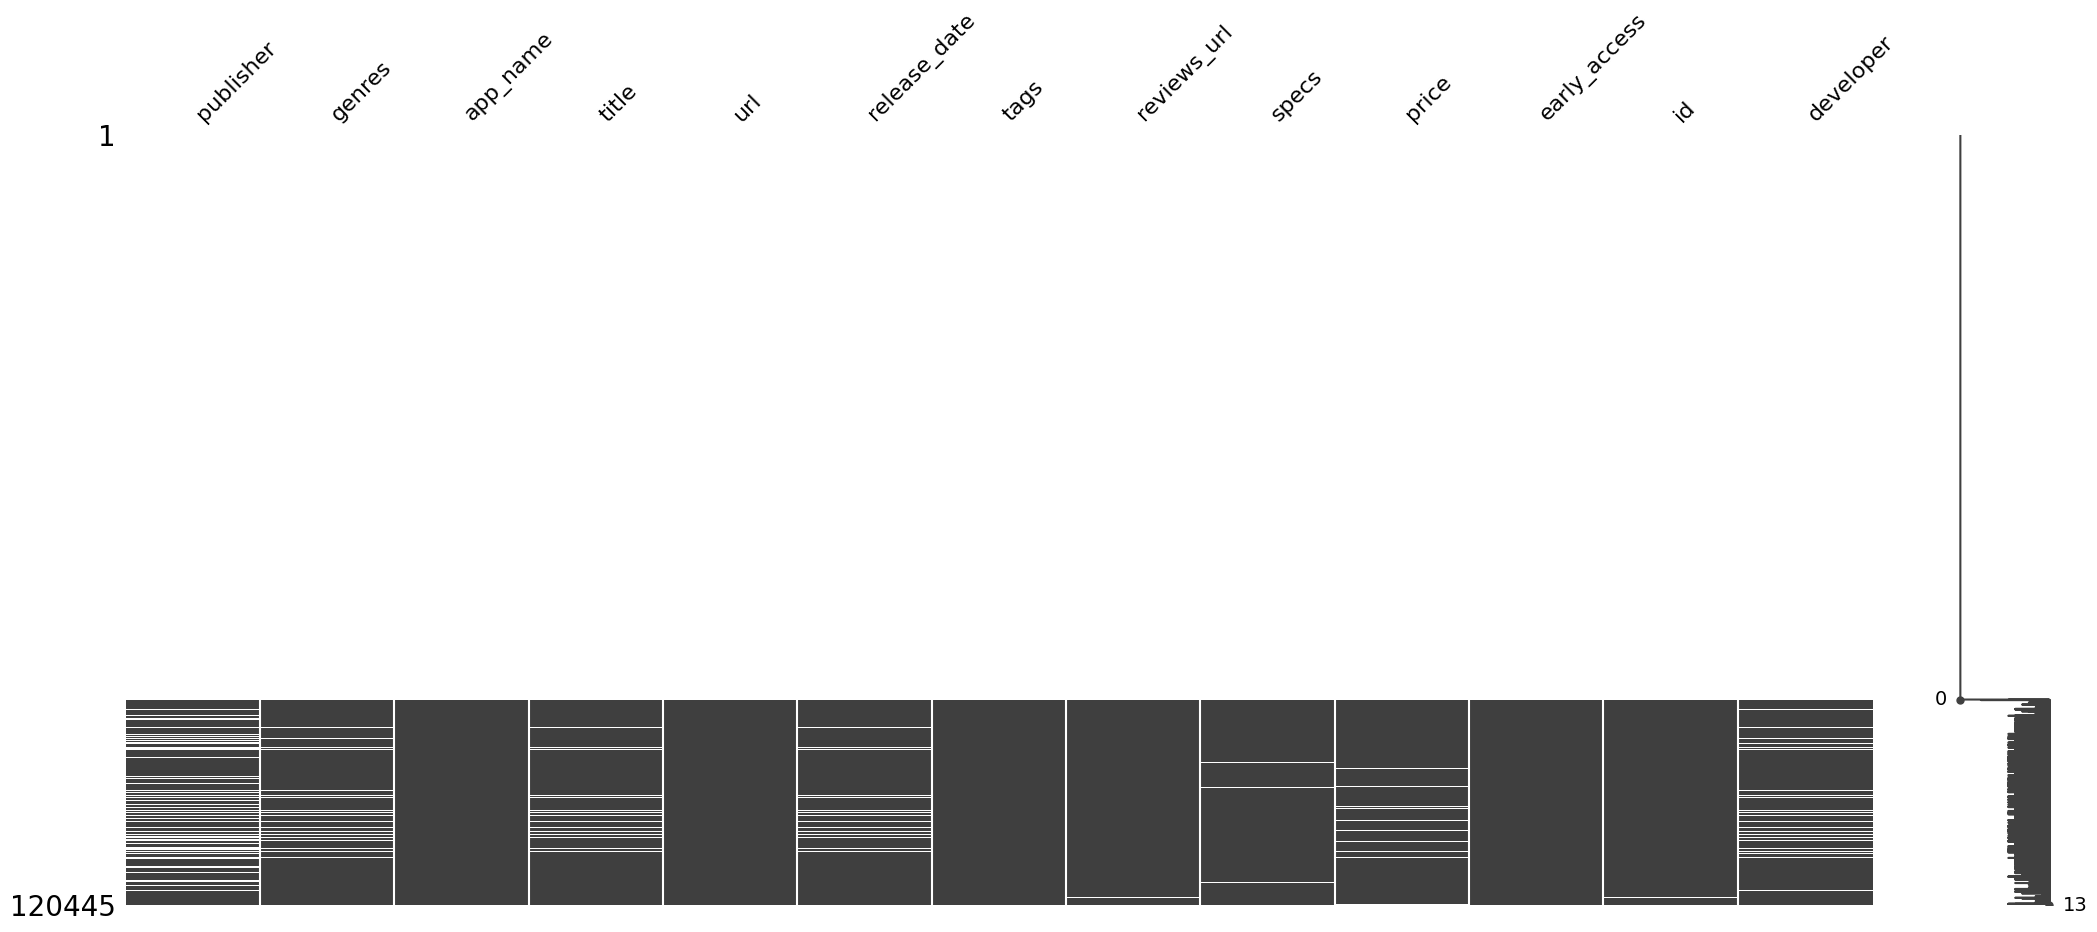

In [8]:
# Visualizar los datos faltantes
msno.matrix(df_steam_games)
plt.show()


- **df_steam_games.isnull().sum():** Cuenta la cantidad de valores nulos en cada columna.

- **msno.matrix():** Crea una matriz visual para mostrar los valores faltantes.

2. Tratar valores nulos:

Eliminar filas: Si hay pocas filas con muchos valores nulos, puedemos eliminarlas:

In [9]:
df_steam_games.dropna(inplace=True)

3. Verificar y corregir tipos de datos:

In [10]:
# Ver los tipos de datos actuales
print(df_steam_games.dtypes)

publisher        object
genres           object
app_name         object
title            object
url              object
release_date     object
tags             object
reviews_url      object
specs            object
price            object
early_access    float64
id              float64
developer        object
dtype: object


In [11]:
# Convertir tipos de datos
df_steam_games['price'] = pd.to_numeric(df_steam_games['price'], errors='coerce')
df_steam_games['release_date'] = pd.to_datetime(df_steam_games['release_date'], errors='coerce')

In [12]:
# Función para evaluar literal de Python de forma segura
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return val  # Retorna el valor original si no se puede evaluar

# Convertir las columnas a listas de forma segura
columns_to_convert = ['genres', 'tags', 'specs']
for column in columns_to_convert:
    df_steam_games[column] = df_steam_games[column].apply(safe_literal_eval)

# Verificar los tipos de datos
print(df_steam_games.dtypes)
print(df_steam_games.head())

publisher               object
genres                  object
app_name                object
title                   object
url                     object
release_date    datetime64[ns]
tags                    object
reviews_url             object
specs                   object
price                  float64
early_access           float64
id                     float64
developer               object
dtype: object
                 publisher                                             genres  \
88310            Kotoshiro      [Action, Casual, Indie, Simulation, Strategy]   
88311     Making Fun, Inc.               [Free to Play, Indie, RPG, Strategy]   
88312         Poolians.com  [Casual, Free to Play, Indie, Simulation, Sports]   
88313                 彼岸领域                        [Action, Adventure, Casual]   
88315  Trickjump Games Ltd                    [Action, Adventure, Simulation]   

                      app_name                    title  \
88310      Lost Summoner Kitty      L

In [13]:
# Ver los tipos de datos actuales
print(df_steam_games.dtypes)

publisher               object
genres                  object
app_name                object
title                   object
url                     object
release_date    datetime64[ns]
tags                    object
reviews_url             object
specs                   object
price                  float64
early_access           float64
id                     float64
developer               object
dtype: object


4. Buscar valores atípicos y consistencia:

- Valores atípicos:

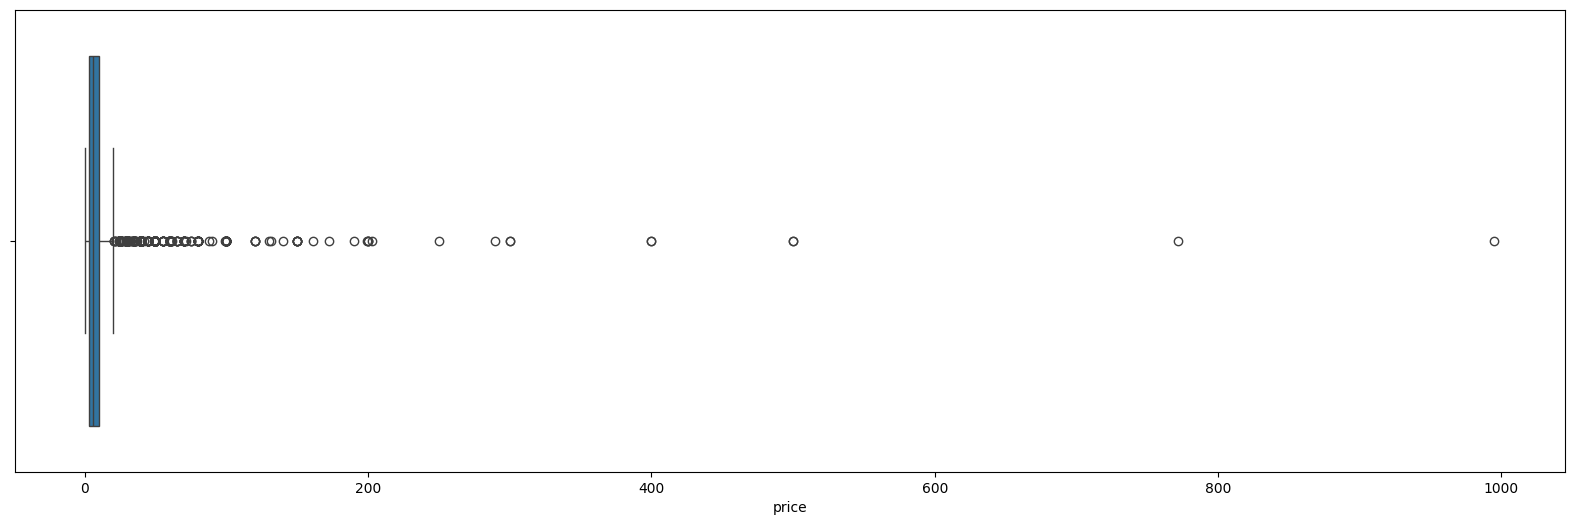

In [14]:
# Configurar el tamaño de la figura
plt.figure(figsize=(20, 6))

# Boxplot para detectar outliers en el precio
sns.boxplot(x=df_steam_games['price'])

# Mostrar el gráfico
plt.show()

- Valores inconsistentes:

In [15]:
# Filtrar por precios negativos
df_steam_games[df_steam_games['price'] < 0]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer


In [16]:
# Filtrar por fechas en el futuro
df_steam_games[df_steam_games['release_date'] > pd.Timestamp.now()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer


5. Valores

**Verificar valores nulos**

In [17]:
print(df_steam_games.isnull().sum())

publisher          0
genres             0
app_name           0
title              0
url                0
release_date      34
tags               0
reviews_url        0
specs              0
price           1308
early_access       0
id                 0
developer          0
dtype: int64


**Imputar valores nulos en la columna 'price'**

In [18]:
df_steam_games['price'].fillna(df_steam_games['price'].median(), inplace=True)

C:\Users\londe\AppData\Local\Temp\ipykernel_11164\857654419.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_steam_games['price'].fillna(df_steam_games['price'].median(), inplace=True)


**Verificar nuevamente valores nulos**

In [19]:
print(df_steam_games.isnull().sum())

publisher        0
genres           0
app_name         0
title            0
url              0
release_date    34
tags             0
reviews_url      0
specs            0
price            0
early_access     0
id               0
developer        0
dtype: int64


**Encontrar valores únicos en la columna 'price'**

In [20]:
unique_prices = df_steam_games['price'].unique().sum()
print("Valores únicos en 'price':", unique_prices)

Valores únicos en 'price': 7486.909999999999


**Contar filas duplicadas**

In [21]:
# Identify columns with list data types
list_columns = df_steam_games.applymap(type).eq(list).any()

# Exclude columns with list data types
subset_columns = df_steam_games.columns[~list_columns]

# Check for duplicates excluding the list columns
duplicates = df_steam_games.duplicated(subset=subset_columns).sum()
print(f"Número de filas duplicadas: {duplicates}")

C:\Users\londe\AppData\Local\Temp\ipykernel_11164\3321489645.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  list_columns = df_steam_games.applymap(type).eq(list).any()


Número de filas duplicadas: 0


**Contar la frecuencia de cada categoría en la columna 'genre'**

In [22]:
genre_counts = df_steam_games['genres'].value_counts()
print("Distribución de géneros:")
print(genre_counts)

Distribución de géneros:
genres
[Action]                                                         1577
[Action, Indie]                                                  1396
[Simulation]                                                     1266
[Strategy]                                                        931
[Action, Adventure, Indie]                                        926
                                                                 ... 
[Action, Casual, Indie, Racing, Strategy]                           1
[Action, Adventure, Massively Multiplayer, Simulation]              1
[Massively Multiplayer, Strategy]                                   1
[Adventure, Casual, Indie, Massively Multiplayer, Simulation]       1
[Adventure, Casual, RPG, Simulation, Early Access]                  1
Name: count, Length: 804, dtype: int64


### Análisis Exploratorio

In [27]:
df_steam_games.describe()

,release_date,price,early_access,id
count,22496,22530.000000,22530.000000,2.253000e+04
mean,2015-03-20 23:08:58.975817984,9.315963,0.060364,4.307164e+05
min,1983-06-19 00:00:00,0.490000,0.000000,1.000000e+01
25%,2014-07-22 00:00:00,2.990000,0.000000,3.022950e+05
50%,2016-04-08 12:00:00,5.990000,0.000000,4.269285e+05
75%,2017-04-21 00:00:00,9.990000,0.000000,5.807075e+05
max,2021-12-31 00:00:00,995.000000,1.000000,2.028850e+06
std,NaN,15.278970,0.238165,1.918424e+05
